# ACCT655 – Analytics for Financial Instruments (Term 3, AY 2020/21) <br> Group Project

#### Members: 
1) Goh Li Jie (Team Lead) <br>
2) Guo Yi (Flim Director) <br>
3) Joshua Lim Zhenhui (Crypto Master) <br>
4) Lim Huey Fang (Research Head) <br>
5) Lai Han-Wen, Rainer (Mr. Robot) <br>
6) Wang Wei (ESG Head Advisor) <br>

## <u> Hypothesis </u>: <br> - High ESG portfolio yield higher returns than Low ESG portfolio <br> - To also view the impact of COVID on the returns


### Import the relevant libraries

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns

from pandas_datareader import data as pdr
import yfinance as yf
 
yf.pdr_override()

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

### 1. Specify the starting and ending dates for the time series & Calculate Average Risk Free rate
(run <u> either</u> Period 1 or Period 2)

### Project main research area: 
#### 1.1 Period 1: Aug 11 - Dec 19 
- please refer to AFI Group Project - Codes (excl COVID) to run this code chunk.


#### 1.2 Period 2: Aug 11 - Jul 21 (inclusive of COVID-19) 
- please refer to AFI Group Project - Codes (incl COVID) to run this code chunk.

In [2]:
# Period 2: including COVID-19 period, i.e. Jan 2020 to Jul 2021
start = datetime(2011, 8, 1)
end = datetime(2021, 7, 31) 


# Read 'DGS10_Jul21.csv' data for 10-year US treasury rates -> https://fred.stlouisfed.org/series/DGS10
rfdf = pd.read_csv("DGS10_Jul21.csv")

# Remove all '.' information from non-trading days
rfdf = rfdf[rfdf.DGS10 != '.']

# Remove NaN (ie empty cells in csv)
rfdf = rfdf.dropna()

# Display to ensure dataset period is aligned to Simulation period 
display(rfdf.head())
display(rfdf.tail())
print('\n')


,DATE,DGS10
0,2011-08-01,2.77
1,2011-08-02,2.66
2,2011-08-03,2.64
3,2011-08-04,2.47
4,2011-08-05,2.58


,DATE,DGS10
2605,2021-07-26,1.29
2606,2021-07-27,1.25
2607,2021-07-28,1.26
2608,2021-07-29,1.28
2609,2021-07-30,1.24


In [3]:
# Convert all data in 'DGS10' column to numeric data
rfdf = rfdf[['DGS10']].apply(pd.to_numeric)


# Calculate Average Risk Free Rate, rf
# based on the whole period
rf = rfdf['DGS10'].mean() / 100
print("Average risk free rate:", round(rf, 4))

Average risk free rate: 0.0206


### 2. Define Risk Aversion Coefficients (A)

In [4]:
# Risk aversion levels
# [LOW,MID,HIGH]
A = [6,8,10]


#  Note: These are abritrary numbers. 
#  Team noted that these set of numbers ensure that risk free is considered and
#  will reflect the moving in weights between risk free and risky portfolio.

### 3. Assign selected assets class and selected securities into respective portfolios <br>
#### We have shortlisted 8 securities across 4 industries:
a) Technology <br>
b) Entertainment <br>
c) Energy <br>
d) Real Estate <br>
- We have also included a risk hedging asset in both portfolios to manage the portfolio systemic risk (i.e. VIXM)

#### 3.1 Components of High ESG Portfolio

In [5]:
# High ESG Portfolio: CSCO,DIS,ICLN,EQIX,VIXM
# a) CSCO --> technology
# b) DIS --> entertainment
# c) ICLN --> energy
# d) EQIX --> real estate

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

hesg_list = ['CSCO','DIS','ICLN','EQIX','VIXM']

hesgstocks_dict = {}

for i in hesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    hesgstocks_dict[i] =  locals()[i]['Adj Close']  
    
hesgstocks = pd.DataFrame(hesgstocks_dict)
display(hesgstocks.head())
display(hesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CSCO,DIS,ICLN,EQIX,VIXM
Date,,,,,
2011-08-01,11.757895,33.848606,11.323569,84.339371,234.000000
2011-08-02,11.483074,32.554184,10.950777,80.288170,240.759995
2011-08-03,11.505361,32.959236,10.880879,80.951233,239.080002
2011-08-04,11.007709,31.127689,10.065393,76.139915,261.119995
2011-08-05,11.096840,30.977989,10.042094,74.514603,263.040009


,CSCO,DIS,ICLN,EQIX,VIXM
Date,,,,,
2021-07-26,55.470001,178.740005,22.379999,826.617126,31.219999
2021-07-27,55.279999,179.500000,22.219999,838.894165,31.709999
2021-07-28,54.770000,179.100006,22.830000,833.393372,31.379999
2021-07-29,55.070000,178.350006,22.770000,783.637512,31.129999
2021-07-30,55.369999,176.020004,22.709999,817.548828,31.690001


#### 3.2 Components of Low ESG Portfolio

In [6]:
# Low ESG Portfolio: FTNT,NFLX,MCHI,SBAC,VIXM
# a) FTNT --> technology
# b) NFLX --> entertainment
# c) MCHI --> energy
# d) SBAC--> real estate

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

lesg_list = ['FTNT','NFLX','MCHI','SBAC','VIXM']

lesgstocks_dict = {}

for i in lesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    lesgstocks_dict[i] =  locals()[i]['Adj Close'] 
    
lesgstocks = pd.DataFrame(lesgstocks_dict)
display(lesgstocks.head())
display(lesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FTNT,NFLX,MCHI,SBAC,VIXM
Date,,,,,
2011-08-01,20.240000,37.625713,40.993233,37.818199,234.000000
2011-08-02,20.129999,36.742859,40.716984,36.823502,240.759995
2011-08-03,21.080000,37.142857,39.955215,38.379566,239.080002
2011-08-04,20.799999,35.110001,38.833488,35.750015,261.119995
2011-08-05,19.620001,34.444286,37.669914,35.040924,263.040009


,FTNT,NFLX,MCHI,SBAC,VIXM
Date,,,,,
2021-07-26,272.339996,516.489990,70.629997,337.633759,31.219999
2021-07-27,271.140015,518.909973,67.790001,340.229492,31.709999
2021-07-28,271.690002,519.299988,71.980003,339.760284,31.379999
2021-07-29,274.209991,514.250000,71.720001,337.883362,31.129999
2021-07-30,272.239990,517.570007,71.269997,340.429169,31.690001


### 4. Quantitative Analysis

#### Set Portfolio parameters

In [7]:
# Specify Number of Assets per Portfolio, Number of Repetitions
num_assets = 5
num_portfolios = 50000

#### 4.1 Comparative Analysis of High ESG portfolio vs Low ESG portfolio
#### (a) HIGH ESG <br> (b) LOW ESG

#### (i) Compute:
1) Returns <br> 
2) Standard Deviation (SD) <br> 
3) Covariance <br> 
4) Correlation <br> 
5) Skewness <br> 
6) Kurtosis

#### (ii) Plot Frontier with Minimum Variance and Max Sharpe Ratio Portfolios

#### 4.1 (a)(i) HIGH ESG: Compute Statistics, Covariance and Correlation

In [8]:
#%% HIGH ESG --- Returns, S.D, Cov, Correlation, Skewness, Kurtosis Info ---

print('\n')
print('-=HIGH ESG PORTFOLIO w/o SPY=-')   
print('\n')

stocks = hesgstocks
selected = hesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=HIGH ESG PORTFOLIO w/o SPY=-


Annual Return:
CSCO    0.1894
DIS     0.1972
ICLN    0.1054
EQIX    0.2657
VIXM   -0.1446
dtype: float64


Annual Std Dev:
CSCO    0.2617
DIS     0.2534
ICLN    0.2665
EQIX    0.2765
VIXM    0.3360
dtype: float64


Variance-Covariance Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM
CSCO  0.0685  0.0324  0.0333  0.0283 -0.0467
DIS   0.0324  0.0642  0.0331  0.0239 -0.0469
ICLN  0.0333  0.0331  0.0710  0.0312 -0.0512
EQIX  0.0283  0.0239  0.0312  0.0765 -0.0395
VIXM -0.0467 -0.0469 -0.0512 -0.0395  0.1129


Correlation Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM
CSCO  1.0000  0.4886  0.4771  0.3904 -0.5306
DIS   0.4886  1.0000  0.4899  0.3411 -0.5504
ICLN  0.4771  0.4899  1.0000  0.4237 -0.5720
EQIX  0.3904  0.3411  0.4237  1.0000 -0.4250
VIXM -0.5306 -0.5504 -0.5720 -0.4250  1.0000


Skewness:
CSCO    0.4258
DIS     0.3346
ICLN    2.5743
EQIX    0.7204
VIXM    2.0695
dtype: float64


Kurtosis:
CSCO   -1.1507
DIS     0.0803
ICLN    6.5982
E

#### 4.1 (a)(ii) HIGH ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [9]:
#%% HIGH ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

    
# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight
0,0.1027,0.1100,0.7455,0.2808,0.1154,0.0915,0.2223,0.2901
1,0.1407,0.1486,0.8081,0.1429,0.3311,0.2312,0.1624,0.1324
2,0.1083,0.1311,0.6690,0.1743,0.3704,0.2228,0.0303,0.2022
3,0.1197,0.1222,0.8108,0.3418,0.0845,0.0813,0.2462,0.2463
4,0.1191,0.1232,0.7991,0.1791,0.2398,0.2045,0.1725,0.2040


,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight
49995,0.1498,0.1485,0.8694,0.2363,0.0574,0.1795,0.3680,0.1589
49996,0.1235,0.1304,0.7888,0.2593,0.1273,0.2254,0.1990,0.1890
49997,0.1243,0.1206,0.8596,0.2319,0.2367,0.1161,0.1988,0.2165
49998,0.1421,0.1732,0.7010,0.0241,0.3550,0.3826,0.1502,0.0881
49999,0.0995,0.1167,0.6761,0.3555,0.0291,0.0805,0.2323,0.3025


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [10]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (High ESG only w/o SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (High ESG only w/o SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
hesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
hesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])


# Assign new variables for subsequent coding
hesg_stats_minvar = min_variance_port
hesg_stats_sharpe = sharpe_portfolio


Minimum Variance Portfolio (High ESG only w/o SPY):
               48520
Returns       0.0668
Volatility    0.0989
Sharpe Ratio  0.4664
CSCO weight   0.1554
DIS weight    0.1923
ICLN weight   0.1999
EQIX weight   0.1068
VIXM weight   0.3456


Optimal Portfolio (High ESG only w/o SPY):
                1603
Returns       0.1894
Volatility    0.1683
Sharpe Ratio  1.0031
CSCO weight   0.1672
DIS weight    0.2985
ICLN weight   0.0028
EQIX weight   0.4277
VIXM weight   0.1038


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

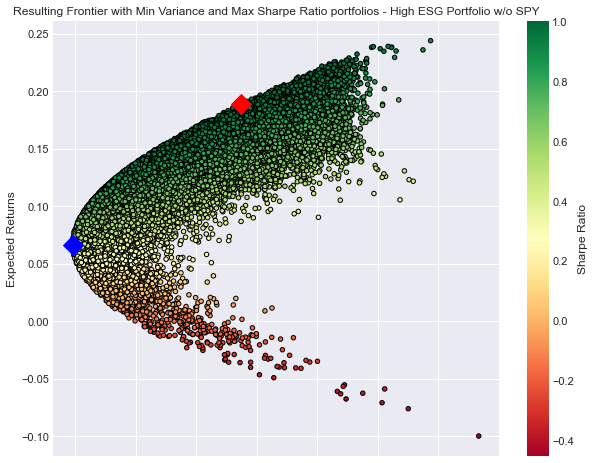

In [11]:
#%% HIGH ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max Sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - High ESG Portfolio w/o SPY')

plt.show();


#### 4.1 (b)(i) LOW ESG: Compute Statistics, Covariance and Correlation

In [12]:
#%% LOW ESG --- Returns, S.D, Cov, Correlation, Skewness, Kurtosis Info ---

print('\n')
print('-=LOW ESG PORTFOLIO w/o SPY=-')    
print('\n')

stocks = lesgstocks
selected = lesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
      
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')

      
# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')

      
# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=LOW ESG PORTFOLIO w/o SPY=-


Annual Return:
FTNT    0.3363
NFLX    0.3901
MCHI    0.0856
SBAC    0.2496
VIXM   -0.1446
dtype: float64


Annual Std Dev:
FTNT    0.3896
NFLX    0.5063
MCHI    0.2456
SBAC    0.2427
VIXM    0.3360
dtype: float64


Variance-Covariance Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM
FTNT  0.1518  0.0463  0.0364  0.0289 -0.0560
NFLX  0.0463  0.2563  0.0358  0.0249 -0.0522
MCHI  0.0364  0.0358  0.0603  0.0221 -0.0462
SBAC  0.0289  0.0249  0.0221  0.0589 -0.0333
VIXM -0.0560 -0.0522 -0.0462 -0.0333  0.1129


Correlation Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM
FTNT  1.0000  0.2346  0.3803  0.3058 -0.4275
NFLX  0.2346  1.0000  0.2875  0.2024 -0.3069
MCHI  0.3803  0.2875  1.0000  0.3704 -0.5595
SBAC  0.3058  0.2024  0.3704  1.0000 -0.4083
VIXM -0.4275 -0.3069 -0.5595 -0.4083  1.0000


Skewness:
FTNT    1.9009
NFLX    0.7453
MCHI    0.8664
SBAC    0.8273
VIXM    2.0695
dtype: float64


Kurtosis:
FTNT    3.6521
NFLX   -0.7976
MCHI    0.0003
SB

#### 4.1 (b)(ii) LOW ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [13]:
#%% LOW ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight
0,0.1608,0.1426,0.9827,0.2808,0.1154,0.0915,0.2223,0.2901
1,0.2184,0.2120,0.9329,0.1429,0.3311,0.2312,0.1624,0.1324
2,0.2005,0.2167,0.8300,0.1743,0.3704,0.2228,0.0303,0.2022
3,0.1807,0.1577,1.0150,0.3418,0.0845,0.0813,0.2462,0.2463
4,0.1849,0.1695,0.9687,0.1791,0.2398,0.2045,0.1725,0.2040


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight
49995,0.1861,0.1564,1.0574,0.2363,0.0574,0.1795,0.3680,0.1589
49996,0.1785,0.1579,0.9997,0.2593,0.1273,0.2254,0.1990,0.1890
49997,0.1986,0.1727,1.0303,0.2319,0.2367,0.1161,0.1988,0.2165
49998,0.2041,0.2292,0.8007,0.0241,0.3550,0.3826,0.1502,0.0881
49999,0.1520,0.1502,0.8748,0.3555,0.0291,0.0805,0.2323,0.3025


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [14]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (Low ESG only w/o SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (Low ESG only w/o SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
lesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
lesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# Assign new variables for subsequent coding
lesg_stats_sharpe = sharpe_portfolio
lesg_stats_minvar = min_variance_port

Minimum Variance Portfolio (Low ESG only w/o SPY):
               40882
Returns       0.0705
Volatility    0.1076
Sharpe Ratio  0.4635
FTNT weight   0.0774
NFLX weight   0.0369
MCHI weight   0.3187
SBAC weight   0.2151
VIXM weight   0.3519


Optimal Portfolio (Low ESG only w/o SPY):
               41164
Returns       0.2432
Volatility    0.1870
Sharpe Ratio  1.1902
FTNT weight   0.2302
NFLX weight   0.1480
MCHI weight   0.0132
SBAC weight   0.4946
VIXM weight   0.1140


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

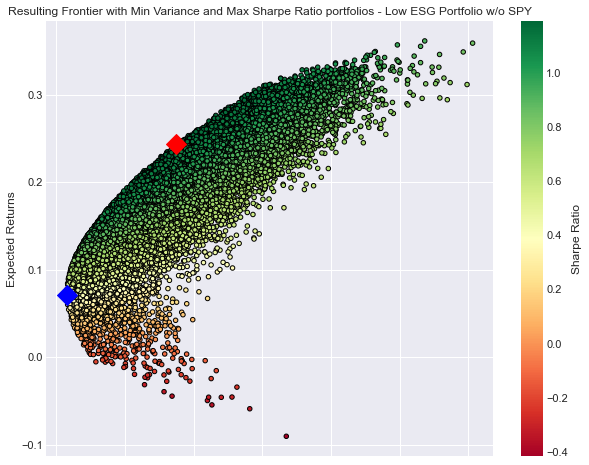

In [15]:
#%% LOW ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max Sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - Low ESG Portfolio w/o SPY')

plt.show();


#### 4.2 Portfolio Optimisation and Sensitivity Analysis
- 2-Assets Optimiser (i.e. Complete portfolio = Optimal Risky Portfolio + Risk Free Asset) <br>  
- Optimal Risky Portfolio = Max Sharpe Ratio Portfolio

#### (a) HIGH ESG <br> (b) LOW ESG



#### Perform sensitivity analysis on different degree of risk aversion: <br> (1) Low <br> (2) Mid <br> (3) High

In [16]:
# call out Risk Aversion set earlier
# [Low, Mid, High]
print('Risk aversion levels (Low, Mid, High):', A)
print('\n')

# Call out risk free rate defined earlier
print("Average risk free rate:", round(rf, 4))

Risk aversion levels (Low, Mid, High): [6, 8, 10]


Average risk free rate: 0.0206


#### 4.2 (a) HIGH ESG: 2-Assets Optimiser

In [17]:
#%% 2-Asset Optimizer [HESG (Max Sharpe) with risk free] 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(hesg_stats_sharpe['Returns'])
std_dev_p = float(hesg_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required
# round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)
    
    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)     

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level   
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}

#### Obtain Max Utility for various risk aversion levels

In [18]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1045


Max utility for Risk aversion (Mid): 0.0836


Max utility for Risk aversion (High): 0.071


#### Compute risk premium of Max Sharpe Ratio Portfolio (High ESG)

In [19]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.1688


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio
- Weight in respective securities

##### 4.2 (a) (1) HIGH ESG: 2-Assets Optimiser with Low Risk Aversion

In [20]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 
    
    
# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)

Weight in risky portfolio (Low A): 0.9934
Weight in risk free asset (Low A): 0.0066


Expected return of Complete Portfolio (Low A): 0.1883
SD of Complete Portfolio (Low A): 0.1672
Sharpe Ratio of Complete Portfolio (Low A): 1.0027


,Weight in Complete Portfolio (Low A)
CSCO,0.1661
DIS,0.2965
ICLN,0.0028
EQIX,0.4249
VIXM,0.1031


##### 4.2 (a) (2) HIGH ESG: 2-Assets Optimiser with Mid Risk Aversion

In [21]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 
    
# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return    
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)
      
# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)
      
# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.7451
Weight in risk free asset (Mid A): 0.2549


Expected return of Complete Portfolio (Mid A): 0.1464
SD of Complete Portfolio (Mid A): 0.1254
Sharpe Ratio of Complete Portfolio (Mid A): 1.0028


,Weight in Complete Portfolio (Mid A)
CSCO,0.1246
DIS,0.2224
ICLN,0.0021
EQIX,0.3187
VIXM,0.0773


##### 4.2 (a) (3) HIGH ESG: 2-Assets Optimiser with High Risk Aversion

In [22]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1

print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)


# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')

# Expected Return   
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.5961
Weight in risk free asset (High A): 0.4039


Expected return of Complete Portfolio (High A): 0.1213
SD of Complete Portfolio (High A): 0.1003
Sharpe of Complete Portfolio (High A): 1.0035


,Weight in Complete Portfolio (High A)
CSCO,0.0997
DIS,0.1779
ICLN,0.0017
EQIX,0.2550
VIXM,0.0619


In [23]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
hesg_2asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(hesg_2asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('High ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 


High ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0710,0.0836,0.1045
weight_risky_portfolio,0.5961,0.7451,0.9934
weight_risk_free,0.4039,0.2549,0.0066
return,0.1213,0.1464,0.1883
standard_deviation,0.1003,0.1254,0.1672
sharpe_ratio,1.0035,1.0028,1.0027


#### 4.2 (b) LOW ESG: 2-Assets Optimiser

In [24]:
#%% 2-Asset Optimizer [LESG (Max Sharpe) with risk free] 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(lesg_stats_sharpe['Returns'])
std_dev_p = float(lesg_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)

    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)
    
    
# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level  
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}

#### Obtain Max Utility for various risk aversion levels

In [25]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1383


Max utility for Risk aversion (Mid): 0.1093


Max utility for Risk aversion (High): 0.0916


#### Compute risk premium of Max Sharpe Ratio Portfolio (Low ESG)

In [26]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.2226


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 4.2 (b) (1) LOW ESG: 2-Assets Optimiser with Low Risk Aversion

In [27]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)

Weight in risky portfolio (Low A): 1
Weight in risk free asset (Low A): 0


Expected return of Complete Portfolio (Low A): 0.2432
SD of Complete Portfolio (Low A): 0.187
Sharpe Ratio of Complete Portfolio (Low A): 1.1901


,Weight in Complete Portfolio (Low A)
FTNT,0.2302
NFLX,0.1480
MCHI,0.0132
SBAC,0.4946
VIXM,0.1140


##### 4.2 (b) (2) LOW ESG: 2-Assets Optimiser with Mid Risk Aversion

In [28]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.7955
Weight in risk free asset (Mid A): 0.2045


Expected return of Complete Portfolio (Mid A): 0.1977
SD of Complete Portfolio (Mid A): 0.1488
Sharpe Ratio of Complete Portfolio (Mid A): 1.1899


,Weight in Complete Portfolio (Mid A)
FTNT,0.1831
NFLX,0.1177
MCHI,0.0105
SBAC,0.3935
VIXM,0.0907


##### 4.2 (b) (3) LOW ESG: 2-Assets Optimiser with High Risk Aversion

In [29]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1
    
print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')

# Expected Return   
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.6364
Weight in risk free asset (High A): 0.3636


Expected return of Complete Portfolio (High A): 0.1623
SD of Complete Portfolio (High A): 0.119
Sharpe of Complete Portfolio (High A): 1.1904


,Weight in Complete Portfolio (High A)
FTNT,0.1465
NFLX,0.0942
MCHI,0.0084
SBAC,0.3148
VIXM,0.0725


In [30]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
lesg_2asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(lesg_2asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('Low ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 


Low ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0916,0.1093,0.1383
weight_risky_portfolio,0.6364,0.7955,1.0000
weight_risk_free,0.3636,0.2045,0.0000
return,0.1623,0.1977,0.2432
standard_deviation,0.1190,0.1488,0.1870
sharpe_ratio,1.1904,1.1899,1.1901


### 5. Assign selected assets class and selected securities into respective portfolios <br>
- Risky portfolio = risky portfolio identified in Section 3 + market portfolio (i.e. S&P500 'SPY')

#### From Section 3, we have shortlisted 8 securities across 4 industries, then include Market Portfolio:
a) Technology <br>
b) Entertainment <br>
c) Energy <br>
d) Real Estate <br>
e) Market Index
- We have also included a risk hedging asset in both portfolios to manage the portfolio systemic risk (i.e. VIXM)



#### 5.1 Components of High ESG Portfolio

In [31]:
# High ESG Portfolio: CSCO,DIS,ICLN,EQIX,VIXM,SPY
# a) CSCO --> technology
# b) DIS --> entertainment
# c) ICLN --> energy
# d) EQIX --> real estate
# e) SPY --> market index

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

hesg_list = ['CSCO','DIS','ICLN','EQIX','VIXM','SPY']

hesgstocks_dict = {}

for i in hesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    hesgstocks_dict[i] =  locals()[i]['Adj Close']  
    
hesgstocks = pd.DataFrame(hesgstocks_dict)
display(hesgstocks.head())
display(hesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CSCO,DIS,ICLN,EQIX,VIXM,SPY
Date,,,,,,
2011-08-01,11.757895,33.848598,11.323568,84.339355,234.000000,105.489105
2011-08-02,11.483075,32.554184,10.950776,80.288155,240.759995,102.794113
2011-08-03,11.505359,32.959240,10.880877,80.951218,239.080002,103.351105
2011-08-04,11.007709,31.127682,10.065392,76.139923,261.119995,98.510010
2011-08-05,11.096840,30.977993,10.042095,74.514603,263.040009,98.362564


,CSCO,DIS,ICLN,EQIX,VIXM,SPY
Date,,,,,,
2021-07-26,55.470001,178.740005,22.379999,826.617126,31.219999,439.611633
2021-07-27,55.279999,179.500000,22.219999,838.894165,31.709999,437.608063
2021-07-28,54.770000,179.100006,22.830000,833.393372,31.379999,437.428619
2021-07-29,55.070000,178.350006,22.770000,783.637512,31.129999,439.242798
2021-07-30,55.369999,176.020004,22.709999,817.548828,31.690001,437.109650


#### 5.2 Components of Low ESG Portfolio

In [32]:
# Low ESG Portfolio: FTNT,NFLX,MCHI,SBAC,VIXM,SPY
# a) FTNT --> technology
# b) NFLX --> entertainment
# c) MCHI --> energy
# d) SBAC--> real estate
# e) SPY --> market index

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

lesg_list = ['FTNT','NFLX','MCHI','SBAC','VIXM','SPY']

lesgstocks_dict = {}

for i in lesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    lesgstocks_dict[i] =  locals()[i]['Adj Close'] 
    
lesgstocks = pd.DataFrame(lesgstocks_dict)
display(lesgstocks.head())
display(lesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FTNT,NFLX,MCHI,SBAC,VIXM,SPY
Date,,,,,,
2011-08-01,20.240000,37.625713,40.993233,37.818203,234.000000,105.489105
2011-08-02,20.129999,36.742859,40.716980,36.823502,240.759995,102.794113
2011-08-03,21.080000,37.142857,39.955215,38.379566,239.080002,103.351105
2011-08-04,20.799999,35.110001,38.833488,35.750011,261.119995,98.510010
2011-08-05,19.620001,34.444286,37.669914,35.040924,263.040009,98.362564


,FTNT,NFLX,MCHI,SBAC,VIXM,SPY
Date,,,,,,
2021-07-26,272.339996,516.489990,70.629997,337.633759,31.219999,439.611633
2021-07-27,271.140015,518.909973,67.790001,340.229492,31.709999,437.608063
2021-07-28,271.690002,519.299988,71.980003,339.760284,31.379999,437.428619
2021-07-29,274.209991,514.250000,71.720001,337.883362,31.129999,439.242798
2021-07-30,272.239990,517.570007,71.269997,340.429169,31.690001,437.109650


### 6. Quantitative Analysis

#### Set Portfolio parameters 

In [33]:
# Specify Number of Assets per Portfolio, Number of Repetitions
num_assets = 6
num_portfolios = 50000

#### 6.1 Comparative Analysis of High ESG portfolio vs Low ESG portfolio
#### (a) HIGH ESG <br> (b) LOW ESG

#### (i) Compute:
1) Returns <br> 
2) Standard Deviation (SD) <br> 
3) Covariance <br> 
4) Correlation <br> 
5) Beta <br>
6) Skewness <br> 
7) Kurtosis

#### (ii) Plot Frontier with Minimum Variance and Max Sharpe Ratio Portfolios

#### 6.1 (a)(i) HIGH ESG: Compute Statistics, Covariance, Correlation, Beta

In [34]:
#%% HIGH ESG --- Returns, S.D, Cov, Correlation, Beta, Skewness, Kurtosis Info ---

print('\n')
print('-=HIGH ESG PORTFOLIO w SPY=-')   
print('\n')

stocks = hesgstocks
selected = hesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix and Beta
# Correlation matrix 
corr = daily_simple_returns.corr()

# Beta
# create a new column in Correlation matrix
corr['BETA'] = 0.0

for i in range(0,corr["BETA"].count()):
    corr.iat[i,6] = corr.iat[i,5] * (annual_std_dev[i] / annual_std_dev[5])

print('Correlation Matrix and Beta:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=HIGH ESG PORTFOLIO w SPY=-


Annual Return:
CSCO    0.1894
DIS     0.1972
ICLN    0.1054
EQIX    0.2657
VIXM   -0.1446
SPY     0.1573
dtype: float64


Annual Std Dev:
CSCO    0.2617
DIS     0.2534
ICLN    0.2665
EQIX    0.2765
VIXM    0.3360
SPY     0.1720
dtype: float64


Variance-Covariance Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM     SPY
CSCO  0.0685  0.0324  0.0333  0.0283 -0.0467  0.0314
DIS   0.0324  0.0642  0.0331  0.0239 -0.0469  0.0300
ICLN  0.0333  0.0331  0.0710  0.0312 -0.0512  0.0331
EQIX  0.0283  0.0239  0.0312  0.0765 -0.0395  0.0272
VIXM -0.0467 -0.0469 -0.0512 -0.0395  0.1129 -0.0444
SPY   0.0314  0.0300  0.0331  0.0272 -0.0444  0.0296


Correlation Matrix and Beta:
        CSCO     DIS    ICLN    EQIX    VIXM     SPY    BETA
CSCO  1.0000  0.4886  0.4771  0.3904 -0.5306  0.6981  1.0623
DIS   0.4886  1.0000  0.4899  0.3411 -0.5504  0.6886  1.0146
ICLN  0.4771  0.4899  1.0000  0.4237 -0.5720  0.7224  1.1192
EQIX  0.3904  0.3411  0.4237  1.0000 -0.4250  0.

#### 6.1 (a)(ii) HIGH ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [35]:
#%% HIGH ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight,SPY weight
0,0.1106,0.1076,0.8365,0.2399,0.0986,0.0781,0.1899,0.2478,0.1457
1,0.1497,0.1534,0.8417,0.2716,0.1897,0.1332,0.1086,0.0950,0.2019
2,0.1677,0.1682,0.8742,0.2201,0.0300,0.1998,0.3704,0.0916,0.0881
3,0.1261,0.1214,0.8683,0.1369,0.1370,0.1634,0.2188,0.1866,0.1574
4,0.1391,0.1451,0.8163,0.2822,0.1261,0.1413,0.0892,0.1147,0.2465


,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight,SPY weight
49995,0.1947,0.1895,0.9181,0.1491,0.1041,0.1317,0.3483,0.0083,0.2586
49996,0.1137,0.1053,0.8842,0.0950,0.1837,0.0912,0.1964,0.2335,0.2003
49997,0.0861,0.1127,0.5808,0.1016,0.4405,0.0302,0.0048,0.3012,0.1217
49998,0.1339,0.1310,0.8642,0.3105,0.2457,0.0367,0.1075,0.1753,0.1242
49999,0.1321,0.1426,0.7818,0.3011,0.0863,0.2166,0.1450,0.1416,0.1095


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [36]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (High ESG w SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (High ESG w SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
hesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
hesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])


# Assign new variables for subsequent coding
hesgwspy_stats_minvar = min_variance_port
hesgwspy_stats_sharpe = sharpe_portfolio

Minimum Variance Portfolio (High ESG w SPY):
               13034
Returns       0.0601
Volatility    0.0780
Sharpe Ratio  0.5052
CSCO weight   0.0040
DIS weight    0.0024
ICLN weight   0.0620
EQIX weight   0.0078
VIXM weight   0.3149
SPY weight    0.6089


Optimal Portfolio (High ESG w SPY):
               23242
Returns       0.1592
Volatility    0.1375
Sharpe Ratio  1.0077
CSCO weight   0.0753
DIS weight    0.1931
ICLN weight   0.0038
EQIX weight   0.3066
VIXM weight   0.1366
SPY weight    0.2847


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

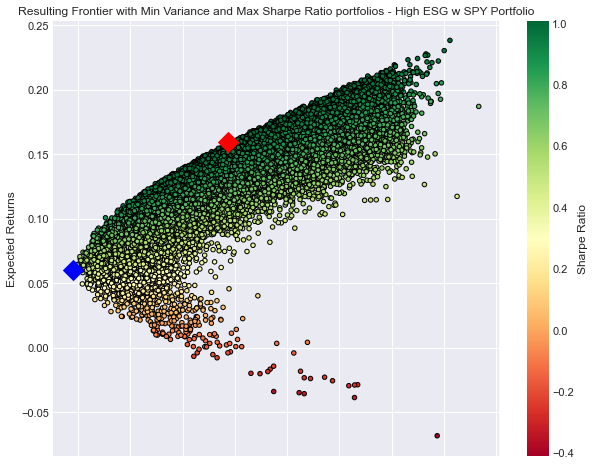

In [37]:
#%% HIGH ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - High ESG w SPY Portfolio')

plt.show();


#### 6.1 (b)(i) LOW ESG: Compute Statistics, Covariance, Correlation, Beta

In [38]:
#%% LOW ESG --- Returns, S.D, Cov, Correlation, Beta, Skewness, Kurtosis Info ---

print('\n')
print('-=LOW ESG PORTFOLIO w SPY=-')    
print('\n')

stocks = lesgstocks
selected = lesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix and Beta
# Correlation matrix 
corr = daily_simple_returns.corr()

# Beta
# create a new column in Correlation matrix
corr['BETA'] = 0.0
for i in range(0,corr["BETA"].count()):
    corr.iat[i,6] = corr.iat[i,5] * (annual_std_dev[i] / annual_std_dev[5])

print('Correlation Matrix and Beta:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=LOW ESG PORTFOLIO w SPY=-


Annual Return:
FTNT    0.3363
NFLX    0.3901
MCHI    0.0856
SBAC    0.2496
VIXM   -0.1446
SPY     0.1573
dtype: float64


Annual Std Dev:
FTNT    0.3896
NFLX    0.5063
MCHI    0.2456
SBAC    0.2427
VIXM    0.3360
SPY     0.1720
dtype: float64


Variance-Covariance Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM     SPY
FTNT  0.1518  0.0463  0.0364  0.0289 -0.0560  0.0346
NFLX  0.0463  0.2563  0.0358  0.0249 -0.0522  0.0315
MCHI  0.0364  0.0358  0.0603  0.0221 -0.0462  0.0277
SBAC  0.0289  0.0249  0.0221  0.0589 -0.0333  0.0232
VIXM -0.0560 -0.0522 -0.0462 -0.0333  0.1129 -0.0444
SPY   0.0346  0.0315  0.0277  0.0232 -0.0444  0.0296


Correlation Matrix and Beta:
        FTNT    NFLX    MCHI    SBAC    VIXM     SPY    BETA
FTNT  1.0000  0.2346  0.3803  0.3058 -0.4275  0.5165  1.1698
NFLX  0.2346  1.0000  0.2875  0.2024 -0.3069  0.3614  1.0637
MCHI  0.3803  0.2875  1.0000  0.3704 -0.5595  0.6569  0.9380
SBAC  0.3058  0.2024  0.3704  1.0000 -0.4083  0.5

#### 6.1 (b)(ii) LOW ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [39]:
#%% LOW ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight,SPY weight
0,0.1603,0.1323,1.0555,0.2399,0.0986,0.0781,0.1899,0.2478,0.1457
1,0.2219,0.1933,1.0410,0.2716,0.1897,0.1332,0.1086,0.0950,0.2019
2,0.1959,0.1697,1.0324,0.2201,0.0300,0.1998,0.3704,0.0916,0.0881
3,0.1658,0.1368,1.0615,0.1369,0.1370,0.1634,0.2188,0.1866,0.1574
4,0.2006,0.1762,1.0214,0.2822,0.1261,0.1413,0.0892,0.1147,0.2465


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight,SPY weight
49995,0.2284,0.1916,1.0844,0.1491,0.1041,0.1317,0.3483,0.0083,0.2586
49996,0.1582,0.1326,1.0374,0.0950,0.1837,0.0912,0.1964,0.2335,0.2003
49997,0.1854,0.2247,0.7333,0.1016,0.4405,0.0302,0.0048,0.3012,0.1217
49998,0.2245,0.1945,1.0478,0.3105,0.2457,0.0367,0.1075,0.1753,0.1242
49999,0.1864,0.1693,0.9789,0.3011,0.0863,0.2166,0.1450,0.1416,0.1095


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [40]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (Low ESG w SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (Low ESG w SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
lesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
lesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# Assign new variables for subsequent coding
lesgwspy_stats_sharpe = sharpe_portfolio
lesgwspy_stats_minvar = min_variance_port


Minimum Variance Portfolio (Low ESG w SPY):
               13034
Returns       0.0598
Volatility    0.0762
Sharpe Ratio  0.5130
FTNT weight   0.0040
NFLX weight   0.0024
MCHI weight   0.0620
SBAC weight   0.0078
VIXM weight   0.3149
SPY weight    0.6089


Optimal Portfolio (Low ESG w SPY):
               13088
Returns       0.2057
Volatility    0.1547
Sharpe Ratio  1.1964
FTNT weight   0.1850
NFLX weight   0.1191
MCHI weight   0.0019
SBAC weight   0.3195
VIXM weight   0.1385
SPY weight    0.2360


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

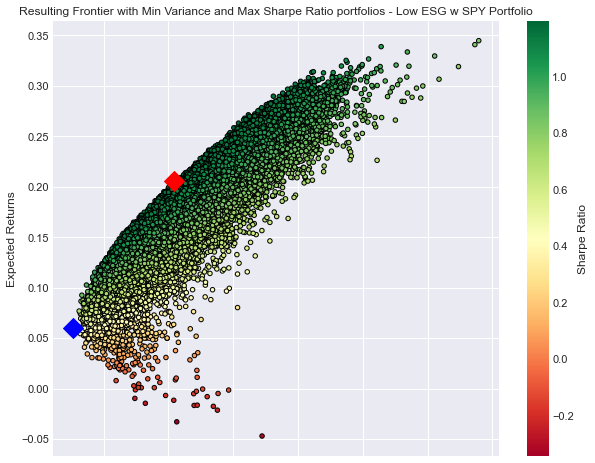

In [41]:
#%% LOW ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - Low ESG w SPY Portfolio')

plt.show();


#### 6.2 Portfolio Optimisation and Sensitivity Analysis
- 3-Assets Optimiser (i.e. Complete portfolio = Optimal Risky Portfolio + Risk Free Asset) <br>  
- Optimal Risky Portfolio = Max Sharpe Ratio Portfolio + Market Portfolio

#### (a) HIGH ESG <br> (b) LOW ESG



#### Perform sensitivity analysis on different degree of risk aversion: <br> (1) Low <br> (2) Mid <br> (3) High

In [42]:
# call out Risk Aversion set earlier
# [Low, Mid, High]
print('Risk aversion levels (Low, Mid, High):', A)
print('\n')

# Call out risk free rate defined earlier
print("Average risk free rate:", round(rf, 4))

Risk aversion levels (Low, Mid, High): [6, 8, 10]


Average risk free rate: 0.0206


#### 6.2 (a) HIGH ESG: 3-Assets Optimiser

In [43]:
#%% 3-Asset Optimizer [HESG (Max Sharpe) with risk free]

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(hesgwspy_stats_sharpe['Returns'])
std_dev_p = float(hesgwspy_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)
    
    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p) 

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level 
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}


#### Obtain Max Utility for various risk aversion levels

In [44]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1025


Max utility for Risk aversion (Mid): 0.0842


Max utility for Risk aversion (High): 0.0715


#### Compute risk premium of Max Sharpe Ratio Portfolio (High ESG)

In [45]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.1386


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 6.2 (a) (1) HIGH ESG: 3-Assets Optimiser with Low Risk Aversion

In [46]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)


Weight in risky portfolio (Low A): 1
Weight in risk free asset (Low A): 0


Expected return of Complete Portfolio (Low A): 0.1592
SD of Complete Portfolio (Low A): 0.1375
Sharpe Ratio of Complete Portfolio (Low A): 1.0077


,Weight in Complete Portfolio (Low A)
CSCO,0.0753
DIS,0.1931
ICLN,0.0038
EQIX,0.3066
VIXM,0.1366
SPY,0.2847


##### 6.2 (a) (2) HIGH ESG: 3-Assets Optimiser with Mid Risk Aversion

In [47]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.9161
Weight in risk free asset (Mid A): 0.0839


Expected return of Complete Portfolio (Mid A): 0.1476
SD of Complete Portfolio (Mid A): 0.126
Sharpe Ratio of Complete Portfolio (Mid A): 1.0076


,Weight in Complete Portfolio (Mid A)
CSCO,0.0690
DIS,0.1769
ICLN,0.0035
EQIX,0.2808
VIXM,0.1251
SPY,0.2608


##### 6.2 (a) (3) HIGH ESG: 3-Assets Optimiser with High Risk Aversion

In [48]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1
    
print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')    

# Expected Return 
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.7329
Weight in risk free asset (High A): 0.2671


Expected return of Complete Portfolio (High A): 0.1222
SD of Complete Portfolio (High A): 0.1008
Sharpe of Complete Portfolio (High A): 1.0075


,Weight in Complete Portfolio (High A)
CSCO,0.0552
DIS,0.1415
ICLN,0.0028
EQIX,0.2247
VIXM,0.1001
SPY,0.2086


In [49]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
hesg_3asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(hesg_3asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('High ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4))


High ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0715,0.0842,0.1025
weight_risky_portfolio,0.7329,0.9161,1.0000
weight_risk_free,0.2671,0.0839,0.0000
return,0.1222,0.1476,0.1592
standard_deviation,0.1008,0.1260,0.1375
sharpe_ratio,1.0075,1.0076,1.0077


#### 6.2 (b) LOW ESG: 3-Assets Optimiser

In [50]:
#%% 3-Asset Optimizer (LESG (Max Sharpe) with risk free) 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(lesgwspy_stats_sharpe['Returns'])
std_dev_p = float(lesgwspy_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)

    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)     

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level  
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}


#### Obtain Max Utility for various risk aversion levels

In [51]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1339


Max utility for Risk aversion (Mid): 0.1102


Max utility for Risk aversion (High): 0.0923


#### Compute risk premium of Max Sharpe Ratio Portfolio (Low ESG)

In [52]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.185


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 6.2 (b) (1) LOW ESG: 3-Assets Optimiser with Low Risk Aversion

In [53]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)


Weight in risky portfolio (Low A): 1
Weight in risk free asset (Low A): 0


Expected return of Complete Portfolio (Low A): 0.2057
SD of Complete Portfolio (Low A): 0.1547
Sharpe Ratio of Complete Portfolio (Low A): 1.1962


,Weight in Complete Portfolio (Low A)
FTNT,0.1850
NFLX,0.1191
MCHI,0.0019
SBAC,0.3195
VIXM,0.1385
SPY,0.2360


##### 6.2 (b) (2) LOW ESG: 3-Assets Optimiser with Mid Risk Aversion

In [54]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1

print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)


Weight in risky portfolio (Mid A): 0.967
Weight in risk free asset (Mid A): 0.033


Expected return of Complete Portfolio (Mid A): 0.1996
SD of Complete Portfolio (Mid A): 0.1496
Sharpe Ratio of Complete Portfolio (Mid A): 1.1962


,Weight in Complete Portfolio (Mid A)
FTNT,0.1788
NFLX,0.1152
MCHI,0.0019
SBAC,0.3090
VIXM,0.1339
SPY,0.2282


##### 6.2 (b) (3) LOW ESG: 3-Assets Optimiser with High Risk Aversion

In [55]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1

print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')
    
# Expected Return 
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)


Weight in risky portfolio (High A): 0.7736
Weight in risk free asset (High A): 0.2264


Expected return of Complete Portfolio (High A): 0.1638
SD of Complete Portfolio (High A): 0.1196
Sharpe of Complete Portfolio (High A): 1.1969


,Weight in Complete Portfolio (High A)
FTNT,0.1431
NFLX,0.0921
MCHI,0.0015
SBAC,0.2472
VIXM,0.1071
SPY,0.1826


In [56]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
lesg_3asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(lesg_3asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('Low ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 

Low ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0923,0.1102,0.1339
weight_risky_portfolio,0.7736,0.9670,1.0000
weight_risk_free,0.2264,0.0330,0.0000
return,0.1638,0.1996,0.2057
standard_deviation,0.1196,0.1496,0.1547
sharpe_ratio,1.1969,1.1962,1.1962
